In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
df=pd.read_csv(r"C:\Users\91638\Desktop\Datassets\train (1).csv")

In [107]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [109]:
import seaborn as sns

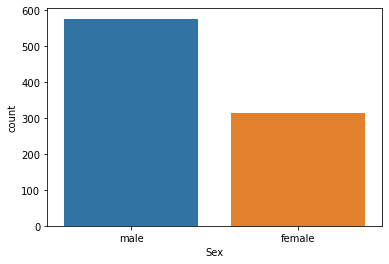

In [110]:
sns.countplot(x='Sex',data=df)

In [111]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

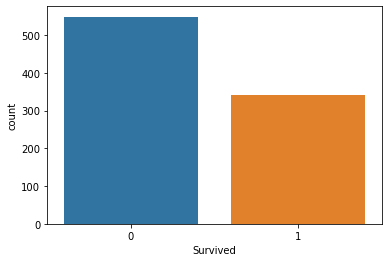

In [112]:
sns.countplot(x="Survived",data=df)

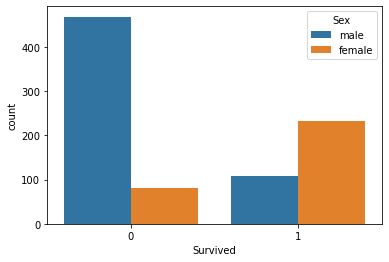

In [113]:
sns.countplot(x='Survived',data=df,hue='Sex')

In [114]:
from sklearn.preprocessing import LabelEncoder

In [115]:
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])

In [116]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [117]:
for i in df.columns:
    print(i,df[i].nunique())

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 88
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 147
Embarked 3


In [118]:
columns_to_drop = ["PassengerId","Name","Ticket","Cabin","Embarked"]

In [119]:
data_clean=df.drop(columns_to_drop,axis=1)

In [120]:
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [121]:
data_clean = data_clean.fillna(data_clean["Age"].mean())

In [122]:
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [123]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [124]:
X=data_clean.drop(columns=['Survived'],axis=1)
y=df['Survived']

In [125]:
print(X.shape,y.shape)

(891, 6) (891,)


# Decision Tree Classification

In [126]:
def entropy(col):
    ent=0.0
    counts=np.unique(col,return_counts=True)
    N=float(col.shape[0])
    for i in counts[1]:
        probability=i/N
        ent+=(-1.0*probability*np.log2(probability))
    return probability

In [130]:
def divide_data(x_data,fkey,fval):
    #Work with Pandas Data Frames
    x_right = pd.DataFrame([],columns=x_data.columns)
    x_left = pd.DataFrame([],columns=x_data.columns)
    
    for ix in range(x_data.shape[0]):
        val = x_data[fkey].loc[ix]
        
        if val > fval:
            x_right = x_right.append(x_data.loc[ix])
        else:
            x_left = x_left.append(x_data.loc[ix])
            
    return x_left,x_right

In [131]:
def information_gain(x_data,fkey,fval):
    
    left,right=divide_data(x_data,fkey,fval)
    l = float(left.shape[0])/x_data.shape[0]
    r = float(right.shape[0])/x_data.shape[0]
    
    if left.shape[0] == 0 or right.shape[0] ==0:
        return -1000000 
    
    i_gain = entropy(x_data.Survived) - (l*entropy(left.Survived)+r*entropy(right.Survived))
    return i_gain

In [132]:
for i in X.columns:
    print(i)
    print(information_gain(data_clean,i,data_clean[i].mean()))

Pclass
-5.551115123125783e-17
Sex
0.0
Age
5.551115123125783e-17
SibSp
0.0
Parch
-5.551115123125783e-17
Fare
0.0


In [133]:
class DecisionTree:
    
    #Constructor
    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
        
    def train(self,X_train):
        
        features = ['Pclass','Sex','Age','SibSp', 'Parch', 'Fare']
        info_gains = []
        
        for ix in features:
            i_gain = information_gain(X_train,ix,X_train[ix].mean())
            info_gains.append(i_gain)
            
        self.fkey = features[np.argmax(info_gains)]
        self.fval = X_train[self.fkey].mean()
        print("Making Tree Features is",self.fkey)
        
        #Split Data
        data_left,data_right = divide_data(X_train,self.fkey,self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
         
        #Truly a left node
        if data_left.shape[0]  == 0 or data_right.shape[0] ==0:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survive"
            else:
                self.target = "Dead"
            return
        #Stop earyly when depth >=max depth
        if(self.depth>=self.max_depth):
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survive"
            else:
                self.target = "Dead"
            return
        
        #Recursive Case
        self.left = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        #You can set the target at every node
        if X_train.Survived.mean() >= 0.5:
            self.target = "Survive"
        else:
            self.target = "Dead"
        return
    
    def predict(self,test):
        if test[self.fkey]>self.fval:
            #go to right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)


In [134]:
split = int(0.7*data_clean.shape[0])
train_data = data_clean[:split]
test_data = data_clean[split:]
test_data = test_data.reset_index(drop=True)

In [135]:
print(train_data.shape,test_data.shape)

(623, 7) (268, 7)


In [136]:
dt = DecisionTree()

In [137]:
dt.train(train_data)

Making Tree Features is Pclass
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is Sex
Making Tree Features is SibSp
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Sex
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is Sex
Making Tree Features is Sex
Making Tree Features is SibSp
Making Tree Features is Sex
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Sex
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is Sex
Making Tree Features is Age
Making Tree Features is Par

In [138]:
y_pred = []
for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[ix]))

In [139]:
y_pred

['Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead'

In [141]:
input_cols = ['Pclass',"Sex","Age","SibSp","Parch","Fare"]
output_cols = ["Survived"]

y_actual = test_data[output_cols]

In [142]:
le = LabelEncoder()
y_pred = le.fit_transform(y_pred)

In [143]:
print(y_pred)


[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0
 1 0 0 0 0 1 1 1 0]


In [144]:
y_pred = np.array(y_pred).reshape((-1,1))
print(y_pred.shape)

(268, 1)


In [145]:
cc = np.sum(y_pred==y_actual)/y_pred.shape[0]

In [146]:
cc = np.sum(np.array(y_pred)==np.array(y_actual))/y_pred.shape[0]

In [147]:
cc

0.8059701492537313